# Day 1 Solutions

It contains things covered on day-1 of hands on session for weak lensing at AstroTwin Colo 2024.

In [1]:
#loading the required packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3,3]
plt.rcParams['figure.dpi'] = 250

Index(['dec', 'lambda', 'ra', 'zred'], dtype='object')


Text(0.5, 1.0, 'Blue = SDSS, Green = HSC')

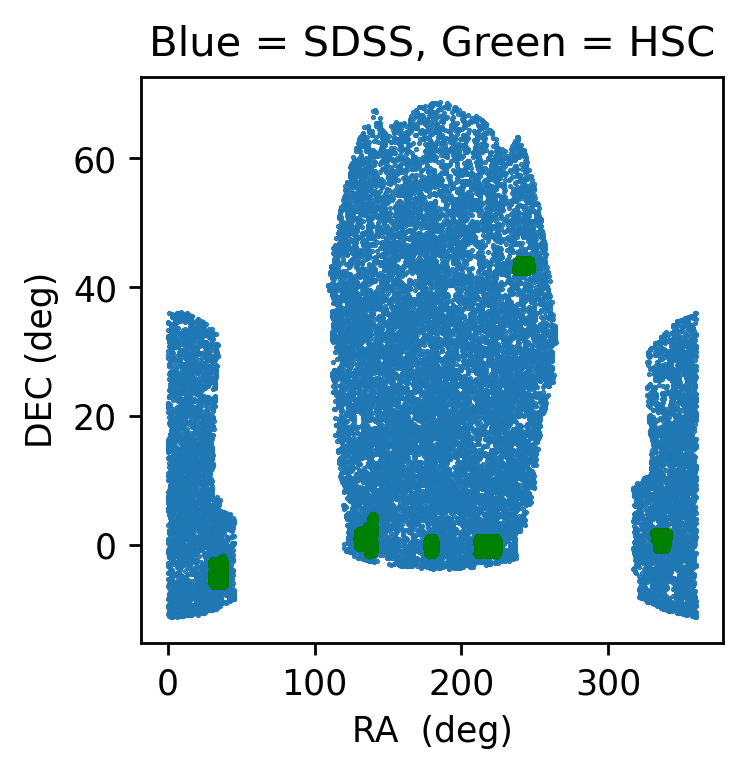

In [18]:
#putting the path of the lens catalog
len_path = '/home/idies/workspace/Storage/divyar/AstroTwin_Colo_2024/DataStore/redmapper.dat'
lenses = pd.read_csv(len_path, delim_whitespace=1)

#printing the columns in the file
print(lenses.keys())

plt.plot(lenses['ra'], lenses['dec'], '.', ms=1.0)

from glob import glob
# we have given you many many files for sources, below code will capture a list of path for the files
# It looks for the file ending '.dat'
sflist = glob('/home/idies/workspace/Storage/divyar/AstroTwin_Colo_2024/DataStore/hsc/*.dat')

for fil in sflist:
    src = pd.read_csv(fil, delim_whitespace=1)
    plt.plot(src['ragal'], src['decgal'], 'g.', ms=1.0)
plt.xlabel('RA  (deg)')
plt.ylabel('DEC (deg)')
plt.title('Blue = SDSS, Green = HSC')

In [4]:
# column names in source data files
#print(sflist[0])
src = pd.read_csv(sflist[0], delim_whitespace=1)
src.keys()

Index(['ragal', 'decgal', 'e1gal', 'e2gal', 'wgal', 'rms_egal', 'mgal',
       'c1_dp', 'c2_dp', 'R2gal', 'zphotgal'],
      dtype='object')

(10.0, 150.0)

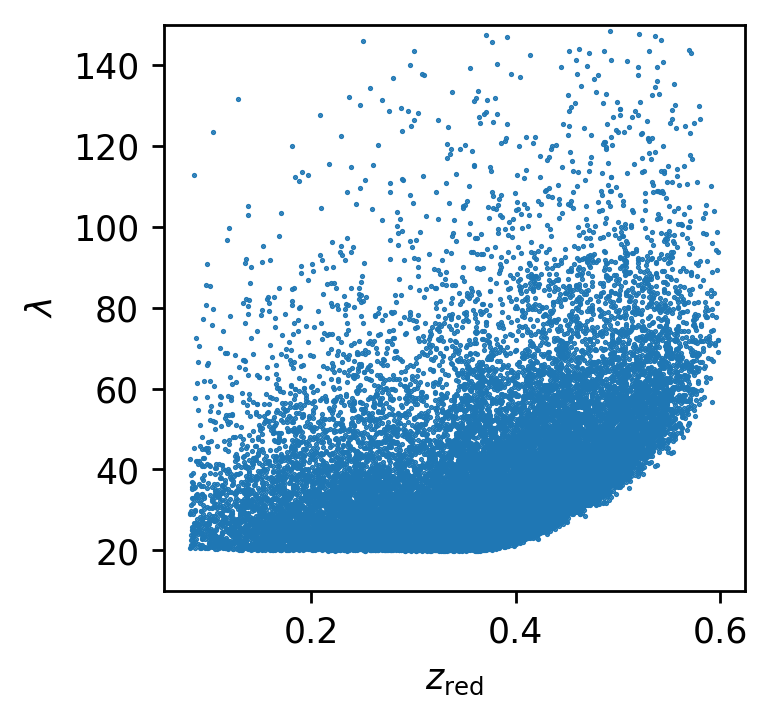

In [11]:

plt.plot(lenses['zred'], lenses['lambda'], '.', ms=1.0)
plt.xlabel(r'$z_{\rm red}$')
plt.ylabel(r'$\lambda$')
plt.ylim(10,150)

no of bins in first selection cut : 3642


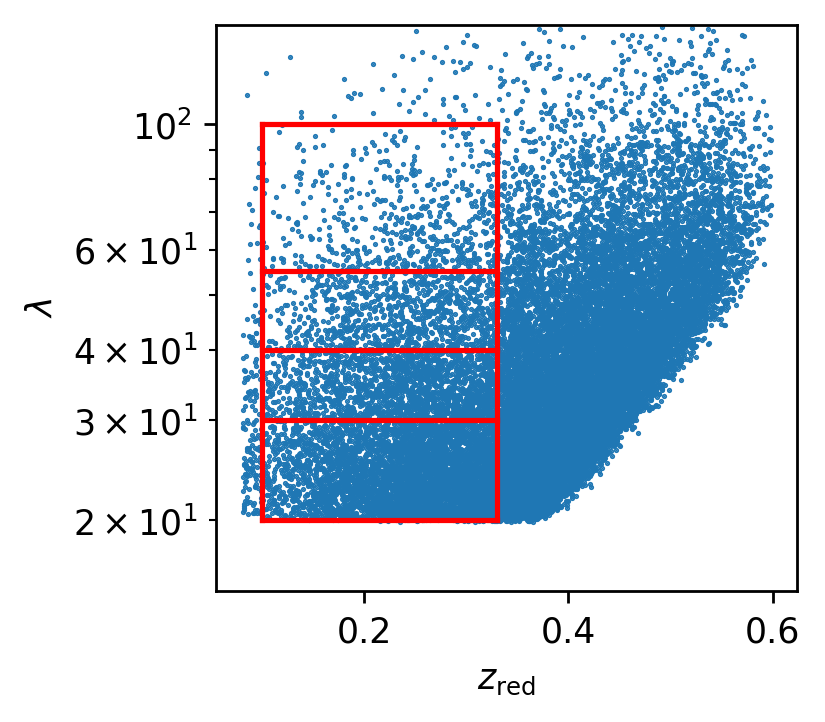

In [12]:
#visualizing the individual selection cuts

plt.plot(lenses['zred'], lenses['lambda'], '.', ms=1.0)
plt.plot(np.linspace(0.1,0.33,10),20*np.ones(10) , 'r-')
plt.plot(np.linspace(0.1,0.33,10),30*np.ones(10) , 'r-')
plt.plot(np.linspace(0.1,0.33,10),40*np.ones(10) , 'r-')
plt.plot(np.linspace(0.1,0.33,10),55*np.ones(10) , 'r-')
plt.plot(np.linspace(0.1,0.33,10),100*np.ones(10), 'r-')

plt.plot(0.1*np.ones(10), np.linspace(20,100,10) ,  'r-')
plt.plot(0.33*np.ones(10), np.linspace(20,100,10) , 'r-')

plt.xlabel(r'$z_{\rm red}$')
plt.ylabel(r'$\lambda$')
plt.ylim(15,150)
plt.yscale('log')

#printing the number of lenses in a selection cut
idx = (lenses['zred']>0.1) & (lenses['zred']<0.33) & (lenses['lambda']>25) & (lenses['lambda']<40)
print('no of bins in first selection cut : %d'%np.sum(idx))

In [2]:
from astropy.cosmology import FlatLambdaCDM

Text(0, 0.5, '$d_{\\rm com} {\\rm [h^{-1}Mpc]}$')

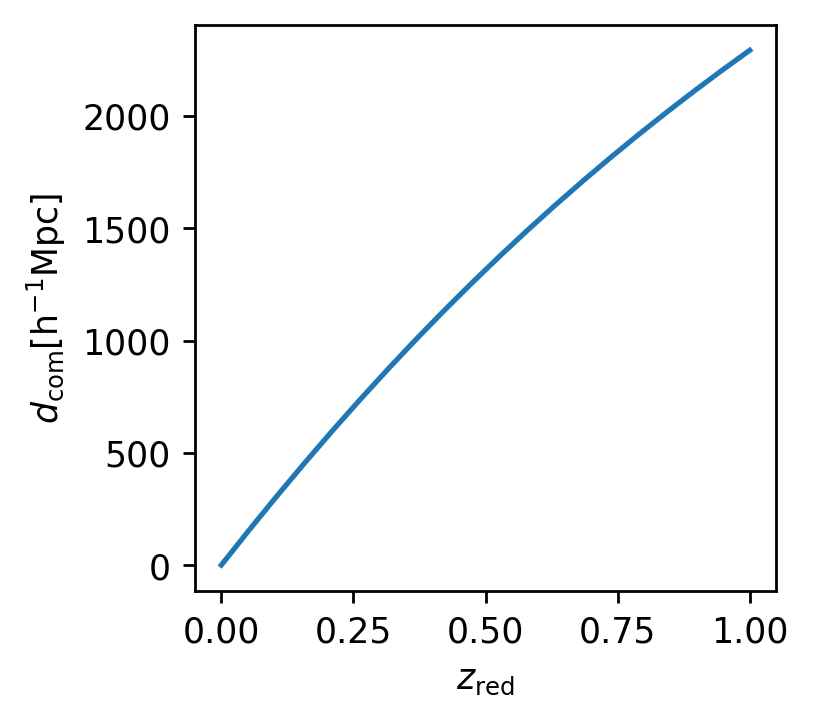

In [14]:
cc = FlatLambdaCDM(H0=100, Om0=0.315) # H0=100 so that we can get distance in units of Mpc h-1
zred = np.linspace(0,1,20)

plt.plot(zred, cc.comoving_distance(zred))
plt.xlabel(r'$z_{\rm red}$')
plt.ylabel(r'$d_{\rm com} {\rm [h^{-1}Mpc]}$')

In [ ]:
Om0 = [0.1,0.3,0.8]

for omg in Om0:
    cc = FlatLambdaCDM(H0=100, Om0=omg) # H0=100 so that we can get distance in units of Mpc h-1
    zred = np.linspace(0,8,100)
    plt.plot(zred, cc.angular_diameter_distance(zred), label=r'$\Omega_m$ = %2.2f'%omg)

plt.legend()

Text(0, 0.5, '$d_{\\rm ang} {\\rm [h^{-1}Mpc]}$')

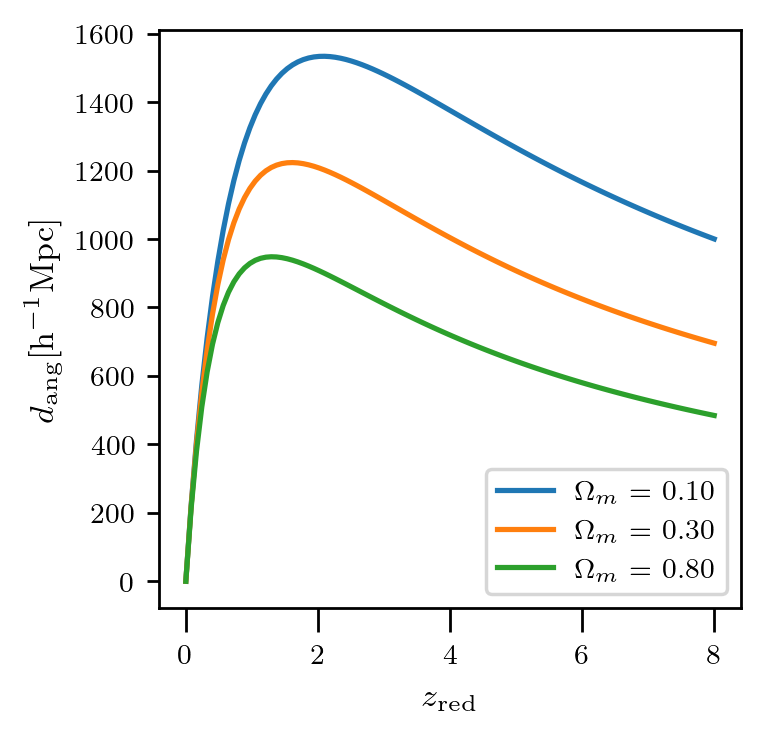

In [ ]:
plt.xlabel(r'$z_{\rm red}$')
plt.ylabel(r'$d_{\rm ang} {\rm [h^{-1}Mpc]}$')

Text(0, 0.5, '$d_{\\rm lum} {\\rm [h^{-1}Mpc]}$')

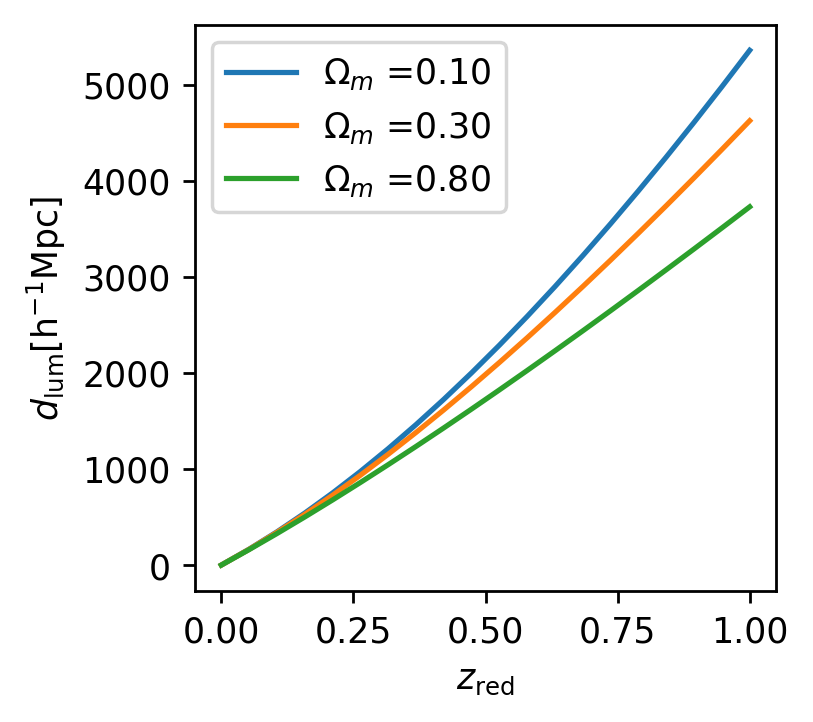

In [16]:
for omg in Om0:
    cc = FlatLambdaCDM(H0=100, Om0=omg) # H0=100 so that we can get distance in units of Mpc h-1
    zred = np.linspace(0,1,20)
    plt.plot(zred, cc.luminosity_distance(zred), label=r'$\Omega_m$ =%2.2f'%omg)
plt.legend()
plt.xlabel(r'$z_{\rm red}$')
plt.ylabel(r'$d_{\rm lum} {\rm [h^{-1}Mpc]}$')